In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#DICCIONARIO QUE VAMOS A CONVERTIR EN UN DATAFRAME CON PANDAS
ventas = [
    {"fecha": "2025-10-01", "producto": "Camisa", "cantidad": 2, "precio_unitario": 20},
    {"fecha": "2025-10-01", "producto": "Pantalón", "cantidad": 1, "precio_unitario": 30},
    {"fecha": "2025-10-02", "producto": "Camisa", "cantidad": None, "precio_unitario": 20},
    {"fecha": "2025-10-02", "producto": "Zapatos", "cantidad": 3, "precio_unitario": 50},
    {"fecha": "2025-10-03", "producto": "Pantalón", "cantidad": 2, "precio_unitario": 30},
    {"fecha": "2025-10-03", "producto": "Zapatos", "cantidad": 1, "precio_unitario": 50},
]

df = pd.DataFrame(ventas)

df.head()



,fecha,producto,cantidad,precio_unitario
0,2025-10-01,Camisa,2.0,20
1,2025-10-01,Pantalón,1.0,30
2,2025-10-02,Camisa,NaN,20
3,2025-10-02,Zapatos,3.0,50
4,2025-10-03,Pantalón,2.0,30


In [7]:
#ESTO TE DICE QUE CANTIDAD DE NULOS HAY EN CADA COLUMNA
df.isna().sum()

fecha              0
producto           0
cantidad           1
precio_unitario    0
dtype: int64

In [10]:
#ELIMINAMOS LOS NULOS PERO NO MODIFICAMOS EL ORIGINAL
df.dropna()

,fecha,producto,cantidad,precio_unitario
0,2025-10-01,Camisa,2.0,20
1,2025-10-01,Pantalón,1.0,30
3,2025-10-02,Zapatos,3.0,50
4,2025-10-03,Pantalón,2.0,30
5,2025-10-03,Zapatos,1.0,50


In [11]:
df.isna().sum()

fecha              0
producto           0
cantidad           1
precio_unitario    0
dtype: int64

In [12]:
#AHORA SÍ, MODIFICAMOS EL ORIGINAL
df = df.dropna()

In [13]:
df.isna().sum()

fecha              0
producto           0
cantidad           0
precio_unitario    0
dtype: int64

In [15]:
#REINDEXAMOS LOS INDICES PARA QUE NO QUEDEN HUECOS
df = df.reset_index(drop=True)

In [16]:
#CREAMOS UNA COLUMNA NUEVA LLAMADA TOTAL PARA PRECIOS
df["total"] = df["cantidad"]*df["precio_unitario"]

In [17]:
df

,fecha,producto,cantidad,precio_unitario,total
0,2025-10-01,Camisa,2.0,20,40.0
1,2025-10-01,Pantalón,1.0,30,30.0
2,2025-10-02,Zapatos,3.0,50,150.0
3,2025-10-03,Pantalón,2.0,30,60.0
4,2025-10-03,Zapatos,1.0,50,50.0


In [18]:
#VAMOS A FILTRAR POR VENTAS QUE SUPEREN LOS 50€
ventas_altas = df[df["total"]>50]

In [19]:
ventas_altas

,fecha,producto,cantidad,precio_unitario,total
2,2025-10-02,Zapatos,3.0,50,150.0
3,2025-10-03,Pantalón,2.0,30,60.0


In [24]:
resumen = df.groupby('producto')['total'].agg(total_ventas='sum', media_total='mean').reset_index()
resumen

,producto,total_ventas,media_total
0,Camisa,40.0,40.0
1,Pantalón,90.0,45.0
2,Zapatos,200.0,100.0


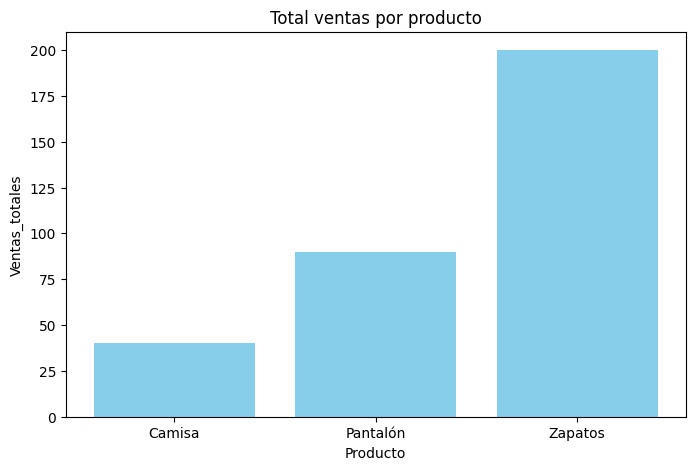

In [27]:
plt.figure(figsize=(8,5))
plt.bar(resumen["producto"], resumen["total_ventas"], color = "skyblue")
plt.title("Total ventas por producto")
plt.xlabel("Producto")
plt.ylabel("Ventas_totales")
plt.show()
